<a href="https://colab.research.google.com/github/Robbysaidiii/MSIB_K2_AWANPINTAR/blob/main/Klasifikasi_Dataset_CIFAR_10_(Model_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Dataset CIFAR 10 (Model CNN)

Contoh Deloyment untuk Domain Computer Vision (CV) <br>
Orbit Future Academy - AI Mastery - KM Batch 3 <br>
Tim Deployment dan Tim CV<br>
2022

## Modules dan Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
import tensorflow.keras.utils
import ssl
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout,LeakyReLU
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline
K.clear_session()

## Import Data

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

## Exploratory Data Analysis (EDA)

In [5]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


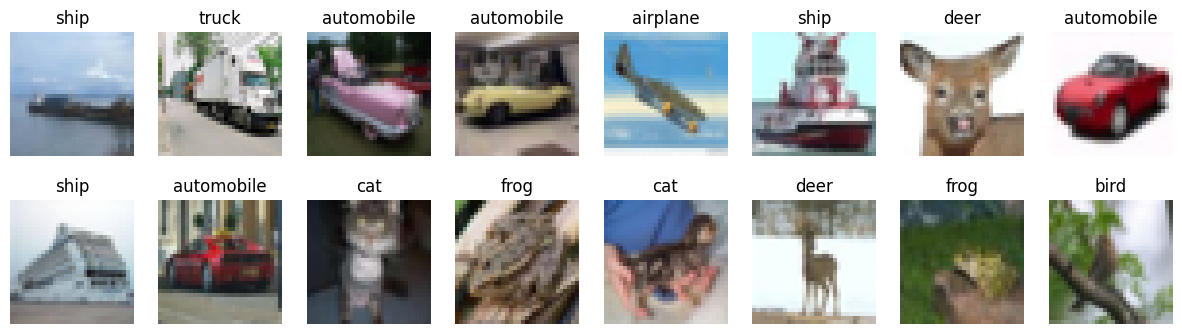

In [11]:
# Menampilkan Gambar pada Dataset Latih
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

## Menyiapkan Data

Kita akan melakukan normalisasi data input seperti berikut : $$x_{norm} = \frac{x}{255} - 0.5$$

Kita perlu melakukan konversi label kelas menjadi one-hot encoded vectors. Silahkan gunakan __keras.utils.to_categorical__.

In [13]:
# Normalisasi Input
x_train2 = (x_train / 255) - 0.5
x_test2  = (x_test / 255) - 0.5

# Mengkonversi Label Class menjadi One-Hot Encoded
y_train2 = tensorflow.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2  = tensorflow.keras.utils.to_categorical(y_test, NUM_CLASSES)

## Membuat Arsitektur Model CNN

In [14]:
def make_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [15]:
model = make_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,084,234 (4.14 MB)

 Trainable params: 1,084,234 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

# Train model

In [19]:
INIT_LR    = 5e-3
BATCH_SIZE = 32
EPOCHS     = 10

model = make_model()

model.compile(
    loss      = 'categorical_crossentropy',
    optimizer = tensorflow.keras.optimizers.Adamax(learning_rate=INIT_LR),
    metrics   = ['accuracy']
)

In [ ]:
model.fit(
    x_train2,
    y_train2,
    batch_size      = BATCH_SIZE,
    epochs          = EPOCHS,
    validation_data = (x_test2, y_test2),
    shuffle         = True,
    verbose         = 1,
)

Epoch 1/10
1563/1563 [==============================] - 165s 105ms/step - loss: 1.6475 - accuracy: 0.3934 - val_loss: 1.0107 - val_accuracy: 0.6429
Epoch 2/10
1563/1563 [==============================] - 150s 96ms/step - loss: 1.0333 - accuracy: 0.6360 - val_loss: 0.9045 - val_accuracy: 0.6887
Epoch 3/10
1563/1563 [==============================] - 150s 96ms/step - loss: 0.8719 - accuracy: 0.6940 - val_loss: 0.7842 - val_accuracy: 0.7258
Epoch 4/10
1563/1563 [==============================] - 150s 96ms/step - loss: 0.7732 - accuracy: 0.7304 - val_loss: 0.7281 - val_accuracy: 0.7455
Epoch 5/10
1563/1563 [==============================] - 147s 94ms/step - loss: 0.7278 - accuracy: 0.7470 - val_loss: 0.6896 - val_accuracy: 0.7607
Epoch 6/10
1563/1563 [==============================] - 162s 103ms/step - loss: 0.6683 - accuracy: 0.7674 - val_loss: 0.6940 - val_accuracy: 0.7603
Epoch 7/10
1563/1563 [==============================] - 142s 91ms/step - loss: 0.6372 - accuracy: 0.7756 - val_loss:

## Prediksi

In [21]:
# Prediksi untuk Data Latih
y_pred_train            = model.predict(x_train2)
y_pred_train_classes    = np.argmax(y_pred_train, axis=1)
y_pred_train_max_probas = np.max(y_pred_train, axis=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step


In [23]:
# Prediksi untuk Data Uji
y_pred_test            = model.predict(x_test2)
y_pred_test_classes    = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


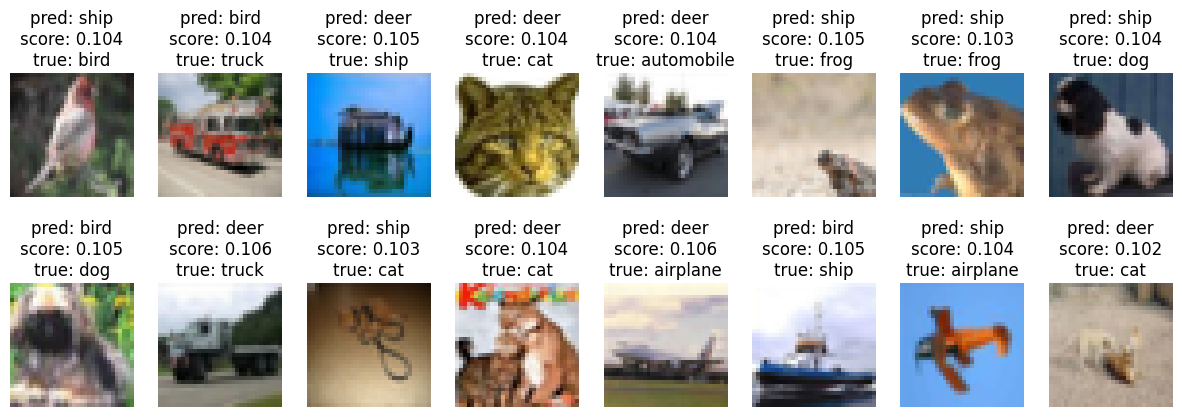

In [24]:
# Menampilkan Hasil Prediksi untuk Data Latih
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        pred_label = cifar10_classes[y_pred_train_classes[random_index]]
        pred_proba = y_pred_train_max_probas[random_index]
        true_label = cifar10_classes[y_train[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

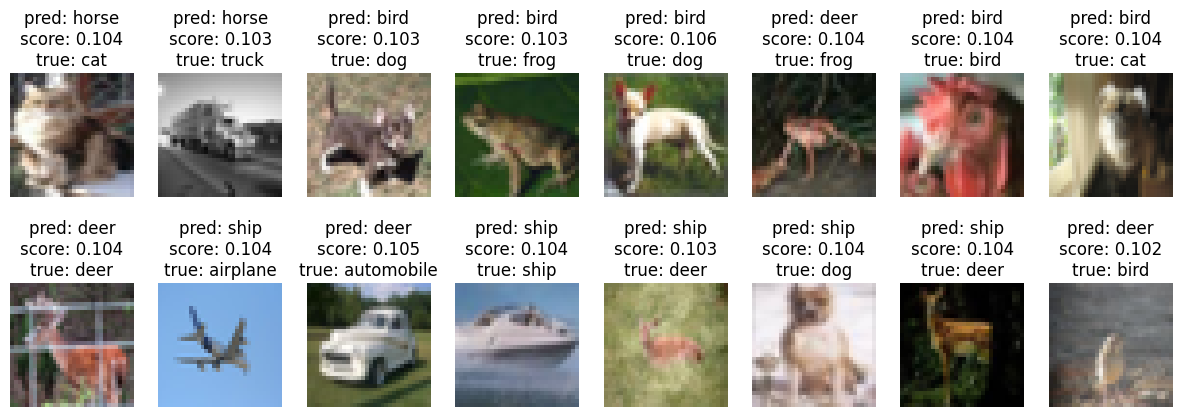

In [25]:
# Menampilkan Hasil Prediksi untuk Data Uji
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

## Evaluate model

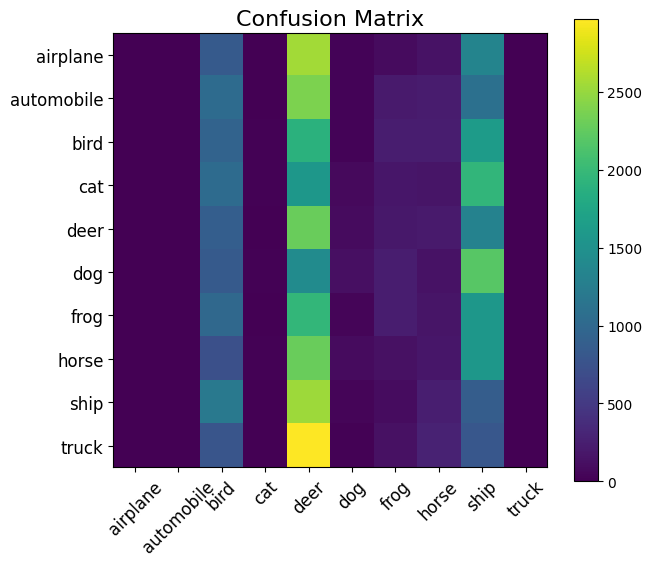

Train Accuracy: 0.09332


In [26]:
# Confusion Matrix dan Akurasi untuk Data Latih
plt.figure(figsize=(7, 6))
plt.title('Confusion Matrix', fontsize=16)
plt.imshow(confusion_matrix(y_train, y_pred_train_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

print("Train Accuracy:", accuracy_score(y_train, y_pred_train_classes))

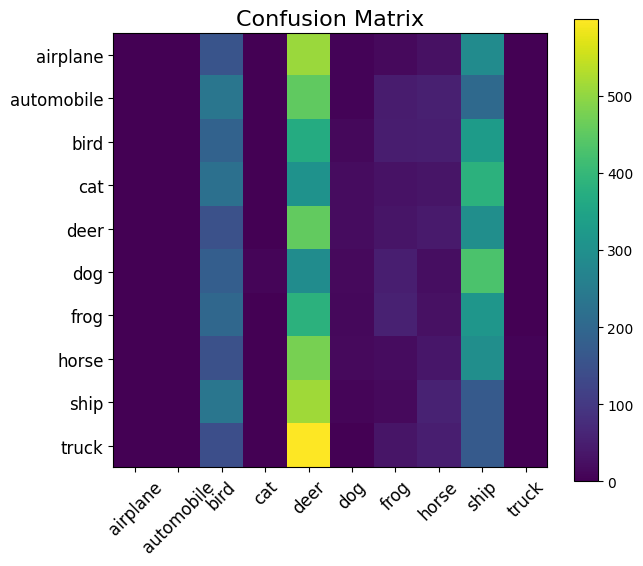

Test Accuracy: 0.0924


In [27]:
# Confusion Matrix dan Akurasi untuk Data Uji
plt.figure(figsize=(7, 6))
plt.title('Confusion Matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

print("Test Accuracy:", accuracy_score(y_test, y_pred_test_classes))

## Menyimpan Model

In [29]:
model.save_weights("model_cifar10_cnn_tf.weights.h5")